<a href="https://colab.research.google.com/github/horsinnaround/Data-Science/blob/main/Copy_of_intro_with_pandapower_edition5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pydgrid
import pydgrid

In [ ]:
from pydgrid import grid

In [ ]:
!pip install pandapower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 4.8 MB/s 
     |████████████████████████████████| 72 kB 1.0 MB/s 
  Created wheel for pandapower: filename=pandapower-2.10.1-py3-none-any.whl size=6146442 sha256=726e42de09b3da99062a67f9cae73577b80180d8229a193263b213b60807acf9
  Stored in directory: /root/.cache/pip/wheels/15/eb/46/eda2673e80dc73abf196bc371ba6d6d91a90fa8bd65a6897d6
Successfully built pandapower


In [ ]:

import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandapower.topology as top
# import networkx as nx
from pandapower import plotting
from pandapower.plotting import simple_plot, pf_res_plotly,simple_plotly

In [ ]:
# !pip install mpl_toolkits


# pandapower

In [ ]:
net = pp.create_empty_network(name="power")

In [ ]:
net

This pandapower network includes the following parameter tables:

In [ ]:
pp.create_bus(net=net,name='bus1',vn_kv=-1)

0

In [ ]:
net

This pandapower network includes the following parameter tables:
   - bus (1 element)

In [ ]:
pp.create_line(net=net,from_bus=3,to_bus=5,length_km=1,std_type='NAYY 4x50 SE')

7

In [ ]:
pp.create_load(net=net,bus=5,p_mw=2)

5

In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (110 elements)
   - load (92 elements)
   - gen (50 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (147 elements)
   - trafo (12 elements)
   - poly_cost (54 elements)
   - bus_geodata (110 elements)
 and the following results tables:
   - res_bus (110 elements)
   - res_line (147 elements)
   - res_trafo (12 elements)
   - res_ext_grid (1 element)
   - res_load (92 elements)
   - res_shunt (14 elements)
   - res_gen (50 elements)

In [ ]:
pp.create_motor(net=net, bus=0, pn_mech_mw=1,cos_phi=0.9)

0

In [ ]:
pp.create_gen(net=net,bus=3,p_mw=4,slack=True)

3

In [ ]:
pp.rundcpp(net=net)

In [ ]:
Net = pn.case9()

In [ ]:
from_bus = Net.line['from_bus']
to_bus = Net.line['to_bus']
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))]

In [ ]:
pp.rundcpp(net=Net)

In [ ]:
pp.drop_buses(Net, O0, drop_elements=True)

In [ ]:
pp.drop_lines(Net,[5,13,15,16,17,168,169])

In [ ]:
pp.overloaded_lines(Net)

Int64Index([], dtype='int64')

In [ ]:
sum(Net.res_line['p_to_mw'])

46.19565217391308

In [ ]:
Net = pn.case30()

In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (41 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)

In [ ]:
pp.create_bus(Net,name=9,vn_kv=0.1)

In [ ]:
pp.create_gen(Net,9,400,)

3

In [ ]:
pp.create_line(Net,from_bus=4,to_bus=9,length_km=1,std_type='NAYY 4x50 SE')

14

In [ ]:
Net.res_bus

,vm_pu,va_degree,p_mw,q_mvar


In [ ]:
Net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,230.0,0.0,-230.0,0.0,0.0,0.0,0.384900,0.384900,0.384900,1.0,0.000000,1.0,-7.590545,92.000000
1,105.0,0.0,-105.0,0.0,0.0,0.0,0.175715,0.175715,0.175715,1.0,-7.590545,1.0,-13.125317,42.000000
2,15.0,0.0,-15.0,0.0,0.0,0.0,0.025102,0.025102,0.025102,1.0,-13.125317,1.0,-14.586360,10.000000
3,85.0,0.0,-85.0,0.0,0.0,0.0,0.142246,0.142246,0.142246,1.0,-11.732457,1.0,-14.586360,28.333333
4,100.0,0.0,-100.0,0.0,0.0,0.0,0.167348,0.167348,0.167348,1.0,-14.586360,1.0,-20.361774,66.666667
8,-125.0,0.0,125.0,0.0,0.0,0.0,0.209185,0.209185,0.209185,1.0,-13.678221,1.0,-7.590545,50.000000


In [ ]:
current = pd.DataFrame()

In [ ]:
Nett = pn.case30()
line = pd.DataFrame()
from_bus = Nett.line['from_bus']
to_bus = Nett.line['to_bus']
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))]
line["line"] =  edges
edges[pp.overloaded_lines(Net)[0]]

In [ ]:
pp.overloaded_lines(Net)[0]

29

Int64Index([31, 32, 34], dtype='int64')
Int64Index([29], dtype='int64')
Int64Index([], dtype='int64')


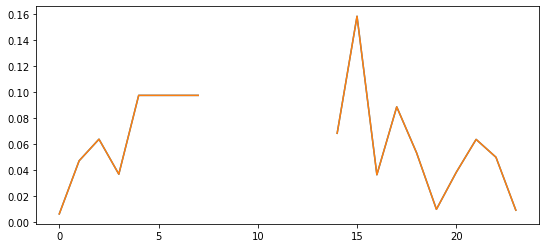

In [ ]:
h= [9,5]
Net = pn.case30();
# pp.drop_buses(Net, [23,26,24,25,28,29], drop_elements=True);
pp.drop_buses(Net, h, drop_elements=True);
linka = []
pp.rundcpp(net=Net);
while len(pp.overloaded_lines(Net))!= 0:
    for i in pp.overloaded_lines(Net):
        linka.append(i)
    print(pp.overloaded_lines(Net));
    pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
    pp.rundcpp(net=Net);
print(pp.overloaded_lines(Net));
current['af_r_7'] = Net.res_line['i_ka'];
current['base'].plot(figsize = (9,4));
current['af_r_7'].plot(figsize = (9,4));

In [ ]:
linka

[31, 32, 34, 29]

In [ ]:
lost = []
for i in range(len(linka)):
    lost.append(line["line"][linka].iloc[i])
lost

[(22, 23), (23, 24), (24, 26), (14, 22)]

In [ ]:
line["line"][linka].iloc[1]

(23, 24)

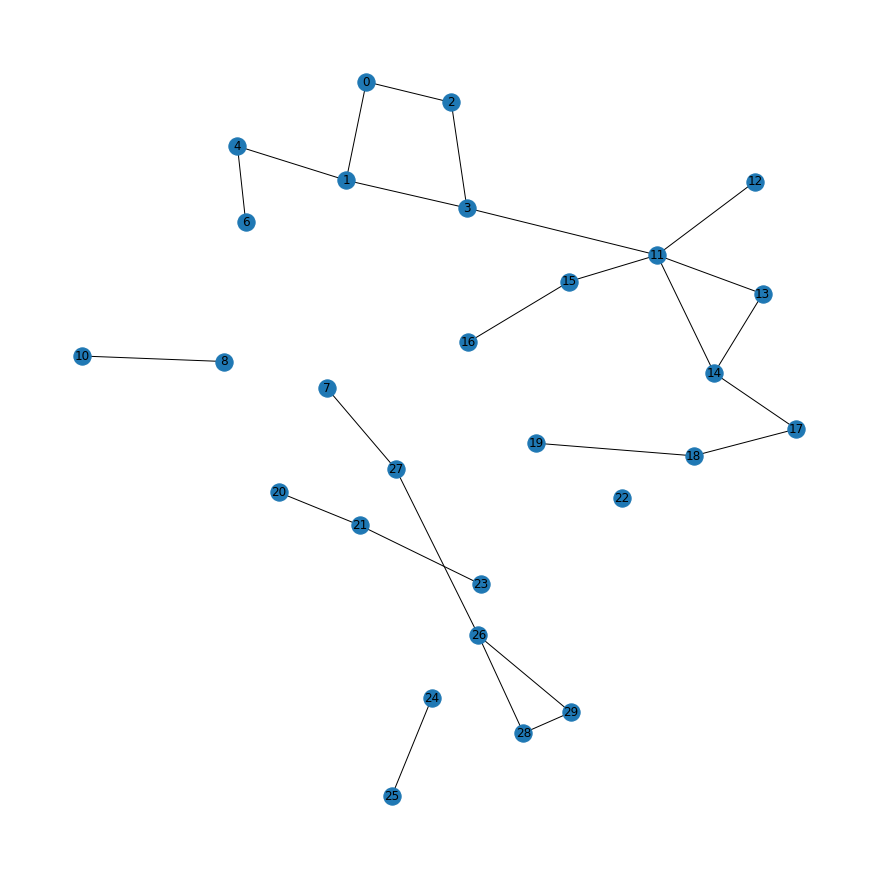

In [ ]:
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility
# g.remove_nodes_from([23,26,24,25,28,29])
g.remove_nodes_from(h)
g.remove_edges_from(lost)
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

# 1 - start with clean attitude

create a power network from IEEE traditional power networks

In [ ]:
Network = pn.case30
Net = Network() # in this example we use IEEE network known as 30-buses
Net

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (41 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)

In [ ]:
G = top.create_nxgraph(Net)

In [ ]:
G.edges()

MultiEdgeDataView([(0, 1), (0, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 5), (3, 11), (4, 6), (5, 6), (5, 7), (5, 8), (5, 9), (5, 27), (7, 27), (8, 10), (8, 9), (9, 19), (9, 16), (9, 20), (9, 21), (11, 12), (11, 13), (11, 14), (11, 15), (13, 14), (14, 17), (14, 22), (15, 16), (17, 18), (18, 19), (20, 21), (21, 23), (22, 23), (23, 24), (24, 25), (24, 26), (26, 27), (26, 28), (26, 29), (28, 29)])

[((0, 0), (0, 1)), ((1, 0), (1, 1)), ((2, 0), (2, 1)), ((3, 0), (3, 1)), ((4, 0), (4, 1)), ((5, 0), (5, 1)), ((6, 0), (6, 1)), ((7, 0), (7, 1)), ((8, 0), (8, 1)), ((9, 0), (9, 1)), ((10, 0), (10, 1)), ((11, 0), (11, 1)), ((12, 0), (12, 1)), ((13, 0), (13, 1)), ((14, 0), (14, 1)), ((15, 0), (15, 1)), ((16, 0), (16, 1)), ((17, 0), (17, 1)), ((18, 0), (18, 1)), ((19, 0), (19, 1)), ((20, 0), (20, 1)), ((21, 0), (21, 1)), ((22, 0), (22, 1)), ((23, 0), (23, 1)), ((24, 0), (24, 1)), ((25, 0), (25, 1)), ((26, 0), (26, 1)), ((27, 0), (27, 1)), ((28, 0), (28, 1)), ((29, 0), (29, 1)), ((30, 0), (30, 1)), ((31, 0), (31, 1)), ((32, 0), (32, 1)), ((33, 0), (33, 1)), ((34, 0), (34, 1)), ((35, 0), (35, 1)), ((36, 0), (36, 1)), ((37, 0), (37, 1)), ((38, 0), (38, 1)), ((39, 0), (39, 1)), ((40, 0), (40, 1)), ((41, 0), (41, 1)), ((42, 0), (42, 1)), ((43, 0), (43, 1)), ((44, 0), (44, 1)), ((45, 0), (45, 1)), ((46, 0), (46, 1)), ((47, 0), (47, 1)), ((48, 0), (48, 1)), ((49, 0), (49, 1)), ((50, 0), (50, 1)),

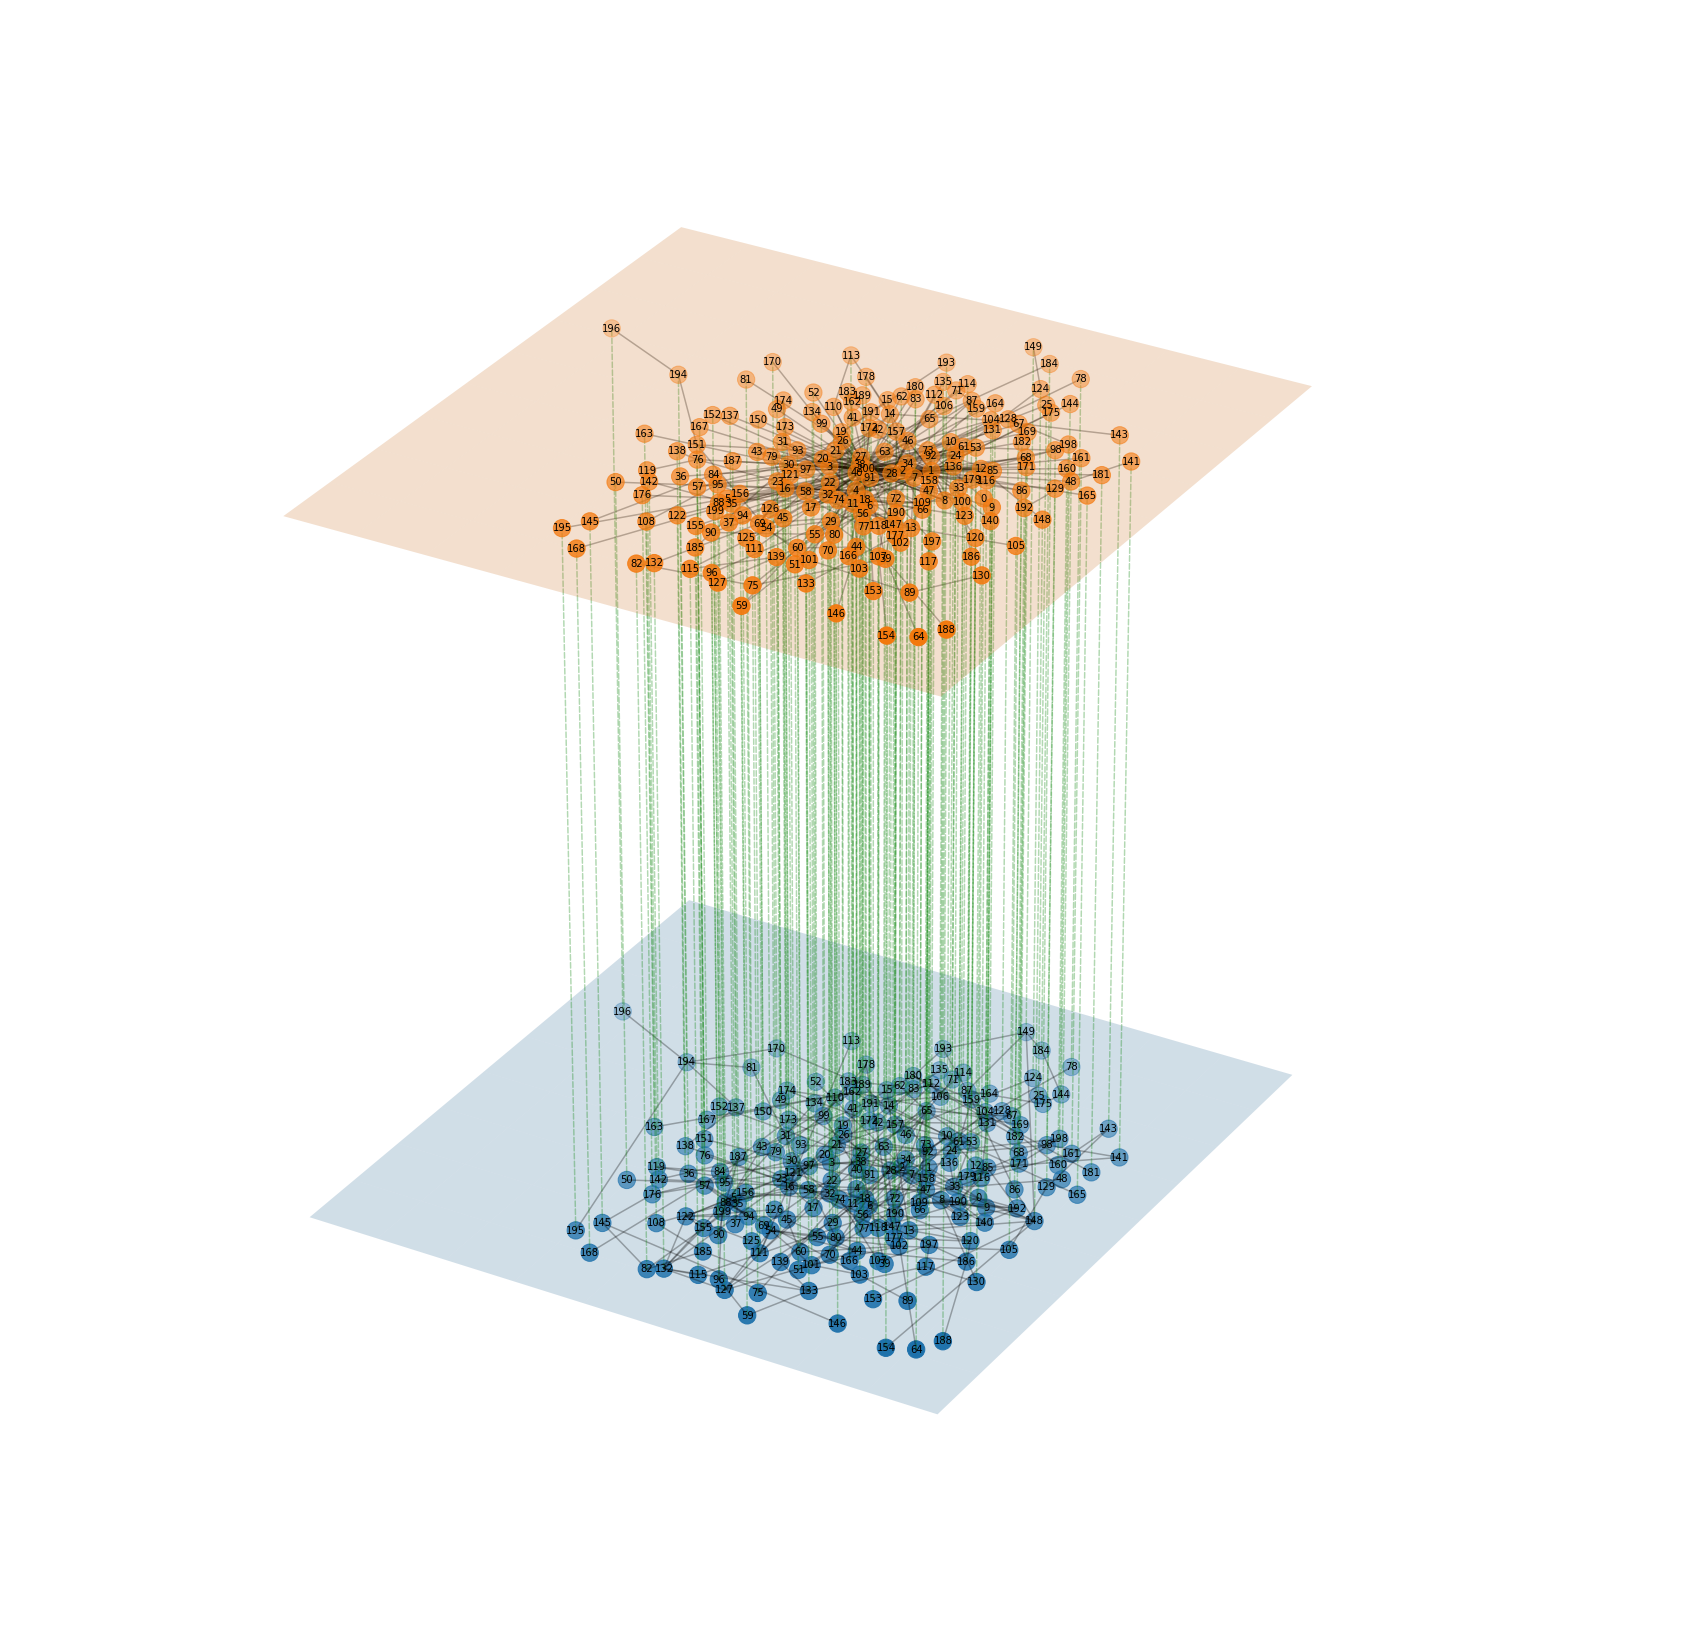

In [ ]:
#!/usr/bin/env python
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.seed = 1531
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs,seed=self.seed)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='g', alpha=0.3, linestyle='--', zorder=2)
        print(self.edges_between_layers)
        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)


if __name__ == '__main__':

    # define graphs
    # n = 50
    seed = 1531
    # n = 10
    # m = 3
    # p = 0.1
    Network = pn.case_illinois200
    Net = Network() # in this example we use IEEE network known as 30-buses
    G = top.create_nxgraph(Net)
    n = len(G.nodes())+1
    # g = nx.watts_strogatz_graph(4*n,m,p,seed = seed)
    # g = nx.erdos_renyi_graph(4*n, p=0.1, seed=seed)
    # h = nx.gnm_random_graph(4*n, 5*n, seed = seed )
    alpha = 0.49
    beta = 0.5
    gamma = 1-(alpha + beta)
    Gr = nx.scale_free_graph(n= n, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
    edge = list(Gr.edges)
    edges = [(i[0],i[1]) for i in edge if i[0]!=i[1] ]
    i = nx.MultiGraph()
    i.add_edges_from(edges)
    mapping = {0:len(i.nodes)-1,len(i.nodes)-1:0}
    i = nx.relabel_nodes(i, mapping)
    # mapping = {5:6,6:5}
    # i = nx.relabel_nodes(i, mapping)
    # i = nx.erdos_renyi_graph(2*n, p=0.4)
    # print(len(i.nodes))
    node_labels = {nn : str(nn) for nn in range(4*n+1)}

    # initialise figure and plot
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([G, i], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

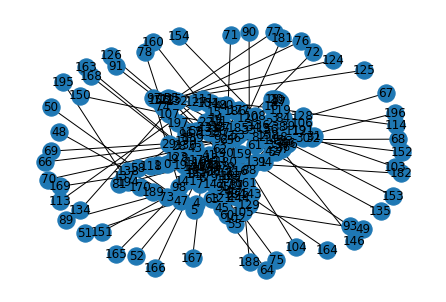

In [ ]:
nx.draw(G,with_labels=True)

In [ ]:
simple_plotly(Net)

In [ ]:
pp.rundcpp(net=Net) #we will solve the current equation

In [ ]:
pp.drop_buses(Net, [22], drop_elements=True); # drop the nodes

In [ ]:
Net.bus['vn_kv'][10] = 110

In [ ]:
pf_res_plotly(Net)

In [ ]:
outages

,otages_rand_num,kind,New_nodes,otages_rand,outage_link,remove_nodes
0,[3],trafo,{0},0.888889,"{(3, 8), (7, 1), (3, 4), (0, 3), (6, 7), (4, 5...",8
1,[4],load,"{0, 1, 2, 3, 5, 6, 7, 8}",0.111111,"{(4, 5), (3, 4), (5, 2)}",1
2,[5],trafo,"{0, 1, 3, 4, 6, 7, 8}",0.222222,"{(4, 5), (5, 6), (5, 2)}",2
3,[2],gen,"{0, 1, 3, 4, 5, 6, 7, 8}",0.111111,"{(5, 2)}",1
4,[6],load,"{0, 1, 2, 3, 4, 5, 7, 8}",0.111111,"{(6, 7), (5, 6)}",1
5,[7],trafo,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
6,[1],gen,"{0, 2, 3, 4, 5, 6, 7, 8}",0.111111,"{(7, 1)}",1
7,[8],load,"{0, 1, 2, 3, 4, 5, 6, 7}",0.111111,"{(3, 8), (7, 8)}",1


In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (8 elements)
   - load (2 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (7 elements)
   - poly_cost (3 elements)
   - bus_geodata (8 elements)
 and the following results tables:
   - res_bus (8 elements)
   - res_line (7 elements)
   - res_ext_grid (1 element)
   - res_load (2 elements)
   - res_gen (2 elements)

In [ ]:
Net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,187.188829,NaN,0.000000,1.0
1,48.000000,NaN,-11.794947,1.0


In [ ]:
Net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,1,True,True,None,300.0,1.0,NaN,None,1.0,True,450,10.0,300.0,-300.0,0.95
1,2,True,True,None,48.0,1.0,NaN,None,1.0,False,450,10.0,300.0,-300.0,0.00


In [ ]:
lik

,1,2,3,3_p,3_pp,3_ppp,3_pppp,3_ppppp,3_pppppp
0,0.112123,0.215337,0.215337,0.139913,0.086360,0.262413,4.312670,0.152113,0.152113
1,0.048476,0.085772,0.085772,0.016042,0.193148,0.194096,4.691114,0.010389,0.010389
2,0.102137,0.064842,0.064842,0.134571,0.343761,0.475296,2.002802,0.004673,0.004673
3,0.142246,0.142246,0.142246,0.309594,0.811637,0.811637,0.811637,0.080327,0.080327
4,0.040109,0.077404,0.077404,0.175022,0.467877,0.336341,1.191164,0.075654,0.075654
5,0.127239,0.089944,0.089944,0.007674,0.300529,0.168993,1.358512,0.091694,0.091694
6,0.272777,0.169563,0.169563,0.077640,0.198132,0.028125,1.946141,0.159154,0.159154
7,0.145538,0.079620,0.079620,0.085314,0.102397,0.140868,0.587629,0.067461,0.067461
8,0.063647,0.129565,0.129565,0.123871,0.106788,0.068317,0.378444,0.141724,0.141724


In [ ]:
pp.overloaded_lines(Net)

Int64Index([], dtype='int64')

In [ ]:
lik = pd.DataFrame()

In [ ]:
lik['3_ppppppp'] = Net.res_line['i_ka']

In [ ]:
pp.rundcpp(net=Net) #we will solve the current equation

In [ ]:
Net = pn.case9()

In [ ]:
pp.create_line(net=Net,from_bus=0,to_bus=3,length_km=2,std_type="70-AL1/11-ST1A 20.0",max_loading_percent=100)

9

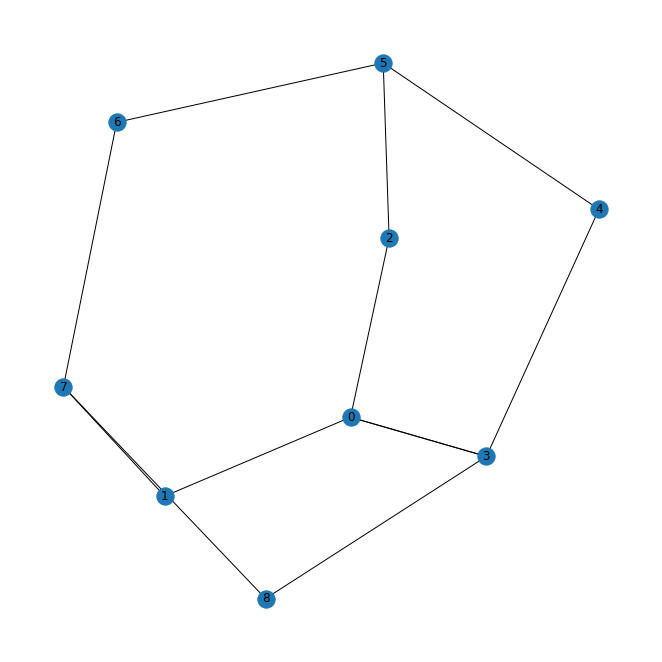

In [ ]:
G = top.create_nxgraph(net=Net)
# G = nx.Graph()
# line = pd.DataFrame()                                           # In here we extract the nodes and
# from_bus = Net.line['from_bus']                                 # edges from this network for basic
# to_bus = Net.line['to_bus']                                     # visualization.
# edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))] # the final edges is list of all the edges
# line["line"] =  edges                  # use matplotlib visual
# G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=3068)    # Seed layout for reproducibility)
plt.figure(figsize=(9,9))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [ ]:
pp.create_line(net=Net,from_bus=0,to_bus=2,length_km=2,std_type="70-AL1/11-ST1A 20.0",max_loading_percent=100)

9

In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (15 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

In [ ]:
Net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,0.000000,1.0,0,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,3,ol,68.558400
1,352.117636,1.0,3,0.0,True,1.0,0.418370,100.0,None,1,20.234250,None,4,ol,109.503000
2,797.836164,1.0,4,0.0,True,1.0,0.251022,100.0,None,1,46.419750,None,5,ol,202.342500
3,0.000000,1.0,2,0.0,True,1.0,0.502044,100.0,None,1,0.000000,None,5,ol,69.748650
4,465.775861,1.0,5,0.0,True,1.0,0.251022,100.0,None,1,14.163975,None,6,ol,119.977200
5,332.060303,1.0,6,0.0,True,1.0,0.418370,100.0,None,1,10.117125,None,7,ol,85.698000
6,0.000000,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,1,ol,74.390625
7,681.949347,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,38.088000,None,8,ol,191.630250
8,392.232304,1.0,8,0.0,True,1.0,0.418370,100.0,None,1,11.902500,None,3,ol,101.171250
9,9.700000,1.0,1,0.0,True,2.0,0.290000,100.0,None,1,0.413200,70-AL1/11-ST1A 20.0,3,ol,0.360000


In [ ]:
Net # we could see diffrent properties of this power network here (before solving current problem)

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (43 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)
 and the following results tables:
   - res_bus (30 elements)
   - res_line (43 elements)
   - res_ext_grid (1 element)
   - res_load (20 elements)
   - res_shunt (2 elements)
   - res_gen (5 elements)

In [ ]:
Net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent


In [ ]:
line = pd.DataFrame()                                           # In here we extract the nodes and
from_bus = Net.line['from_bus']                                 # edges from this network for basic
to_bus = Net.line['to_bus']                                     # visualization.
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))] # the final edges is list of all the edges
line["line"] =  edges

In [ ]:
pp.rundcpp(net=Net) #we will solve the current equation

In [ ]:
pp.overloaded_lines(Net) # this line will show the overloaded lines

Int64Index([], dtype='int64')

In [ ]:
Net.load

In [ ]:
name = list(Net.bus['name'])
name

In [ ]:
Net.load['bus']

In [ ]:
p = set(loads)
len(p)

29

In [ ]:
for i in name:
    if i not in p:
        print(i)

In [ ]:
Net.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,30,True,None,0.0,0.982,646.0,0.0,300.0,-100.0,1.0


In [ ]:
loads = list(Net.load['bus'])
gens = list(Net.gen['bus'])
shunts = list(Net.shunt['bus'])
ext = list(Net.ext_grid['bus'])

In [ ]:
ext['max_p_mw']

0    646.0
Name: max_p_mw, dtype: float64

In [ ]:
sum(gens['p_mw']) + 646

6266.0

In [ ]:
lk = list(loads['bus'])
ln = [0 for i in range(len(lk))]

In [ ]:
lke = list(ext['bus'])
lne = [1 for i in range(len(lke))]

In [ ]:
lkg = list(gens['bus'])
lng = [12 for i in range(len(lkg))]

In [ ]:
lk.extend(lke)


In [ ]:
pp.drop_buses(Net, [9], drop_elements=True); # drop the nodes

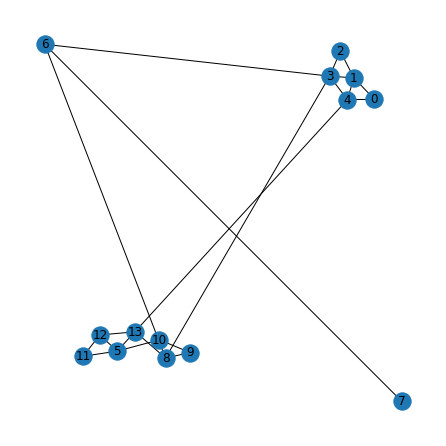

In [ ]:
G = top.create_nxgraph(Net)
pos = nx.spring_layout(G, seed=3068)    # Seed layout for reproducibility)
plt.figure(figsize=(6,6))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [ ]:
centrry(G)

source vertex {target:length, }
0 {0: 0, 1: 1, 4: 1, 2: 2, 3: 2} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 1} 
4 {4: 0, 0: 1, 1: 1, 3: 1, 2: 2} 
2 {2: 0, 1: 1, 3: 1, 0: 2, 4: 2} 
3 {3: 0, 1: 1, 2: 1, 4: 1, 0: 2} 
5 {5: 0, 10: 1, 11: 1, 12: 1, 9: 2, 13: 2, 8: 3} 
10 {10: 0, 9: 1, 5: 1, 8: 2, 11: 2, 12: 2, 13: 3} 
11 {11: 0, 12: 1, 5: 1, 10: 2, 13: 2, 8: 3, 9: 3} 
12 {12: 0, 13: 1, 11: 1, 5: 1, 8: 2, 10: 2, 9: 3} 
8 {8: 0, 9: 1, 13: 1, 10: 2, 12: 2, 11: 3, 5: 3} 
9 {9: 0, 8: 1, 10: 1, 5: 2, 13: 2, 11: 3, 12: 3} 
13 {13: 0, 8: 1, 12: 1, 9: 2, 5: 2, 11: 2, 10: 3} 

average shortest path length 1.4054054054054055
with lenght X we have y path
0 12
1 30
2 22
3 10
some shit happens because of parted grapg


In [ ]:
def centrry(G):
    pathlengths = []
    print("source vertex {target:length, }")
    for v in G.nodes():
        spl = dict(nx.single_source_shortest_path_length(G, v))
        print(f"{v} {spl} ")
        for p in spl:
            pathlengths.append(spl[p])

    print()
    print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

    # histogram of path lengths
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1

    # print()
    print("with lenght X we have y path")
    verts = dist.keys()
    for d in sorted(verts):
        print(f"{d} {dist[d]}")
    try:
        print(f"radius: {nx.radius(G)}")
        print(f"diameter: {nx.diameter(G)}") #maximum lenght
        print(f"eccentricity: {nx.eccentricity(G)}")
        print(f"center: {nx.center(G)}")
        print(f"periphery: {nx.periphery(G)}") # nodes with max lenght
        print(f"density: {nx.density(G)}")
    except:print("some shit happens because of parted grapg")

In [ ]:
G0 = biggest_sub(G)

NameError: ignored

In [ ]:
centrry(G)

source vertex {target:length, }
0 {0: 0, 1: 1, 4: 1, 2: 2, 3: 2, 5: 2, 6: 3, 8: 3, 10: 3, 11: 3, 12: 3, 7: 4, 9: 4, 13: 4} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 8: 2, 7: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3} 
4 {4: 0, 0: 1, 1: 1, 3: 1, 5: 1, 2: 2, 6: 2, 8: 2, 10: 2, 11: 2, 12: 2, 7: 3, 9: 3, 13: 3} 
2 {2: 0, 1: 1, 3: 1, 0: 2, 4: 2, 6: 2, 8: 2, 5: 3, 7: 3, 9: 3, 13: 3, 10: 4, 11: 4, 12: 4} 
3 {3: 0, 1: 1, 2: 1, 4: 1, 6: 1, 8: 1, 0: 2, 5: 2, 7: 2, 9: 2, 13: 2, 10: 3, 11: 3, 12: 3} 
5 {5: 0, 10: 1, 11: 1, 12: 1, 4: 1, 0: 2, 1: 2, 3: 2, 9: 2, 13: 2, 2: 3, 6: 3, 8: 3, 7: 4} 
10 {10: 0, 9: 1, 5: 1, 4: 2, 8: 2, 11: 2, 12: 2, 0: 3, 1: 3, 3: 3, 6: 3, 13: 3, 2: 4, 7: 4} 
11 {11: 0, 12: 1, 5: 1, 4: 2, 10: 2, 13: 2, 0: 3, 1: 3, 3: 3, 8: 3, 9: 3, 2: 4, 6: 4, 7: 5} 
12 {12: 0, 13: 1, 11: 1, 5: 1, 4: 2, 8: 2, 10: 2, 0: 3, 1: 3, 3: 3, 6: 3, 9: 3, 2: 4, 7: 4} 
8 {8: 0, 9: 1, 3: 1, 13: 1, 6: 1, 1: 2, 2: 2, 4: 2, 7: 2, 10: 2, 12: 2, 0: 3, 5: 3, 11: 3} 
9 {9: 0, 8: 1, 10: 1, 3: 2, 5: 2, 6: 2, 13: 2

Example-1: a quick and shor implementation.

In [ ]:
Network = pn.case14

Int64Index([], dtype='int64')


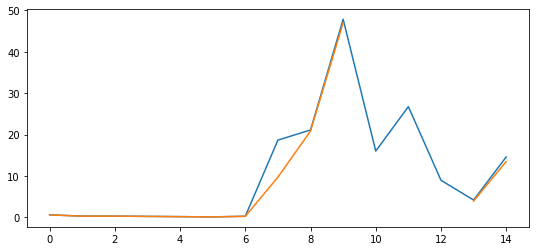

In [ ]:
current = pd.DataFrame() # just some visualization
h= [9] # this is list of nodes that we want to remove in first place
# h = remove_edges
Net = Network(); # create a new network each time we run
pp.rundcpp(net=Net); # run the current equation 
current['base'] = Net.res_line['i_ka'];
pp.drop_buses(Net, h, drop_elements=True); # drop the nodes
linka = []  # list o removed lines
pp.rundcpp(net=Net); # run the current equation 
while len(pp.overloaded_lines(Net))!= 0:
    for i in pp.overloaded_lines(Net):
        linka.append(i)
    print(pp.overloaded_lines(Net));
    pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
    pp.rundcpp(net=Net);
print(pp.overloaded_lines(Net));
current['af_r_7'] = Net.res_line['i_ka'];
current['base'].plot(figsize = (9,4));
current['af_r_7'].plot(figsize = (9,4));

[]


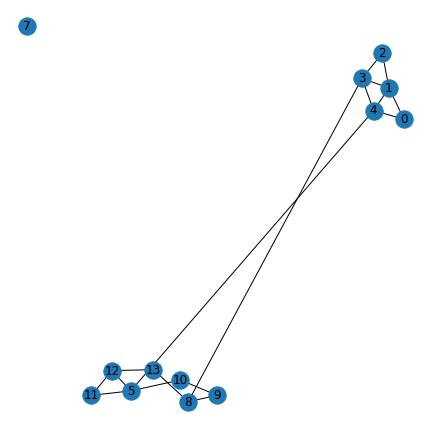

In [ ]:
lost = []                                       # list of edges that 
for i in range(len(linka)):                     # must be removed
    lost.append(line["line"][linka].iloc[i])
print(lost)
#-------------------------------------------------------------------------------
G = top.create_nxgraph(Net)
original_nodes = G.nodes()
pos = nx.spring_layout(G, seed=3068)    # Seed layout for reproducibility)
G.remove_nodes_from(h)
G.remove_edges_from(lost)
plt.figure(figsize=(6,6))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [ ]:
def biggest_sub(G):
    # identify largest connected component
    old_nodes = set(G.nodes())
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(Gcc[0])

In [ ]:
H = sorted(nx.connected_components(G), key=len, reverse=True)
print(H)
#! check if ext_bus is in there else go next
print("presentage of reminders: {}".format(len(H[0])/len(G.nodes)))

[{0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13}, {7}]
presentage of reminders: 0.9230769230769231


len of the largest component is: 12
presentage of the reminded nodes are: 0.8571428571428571


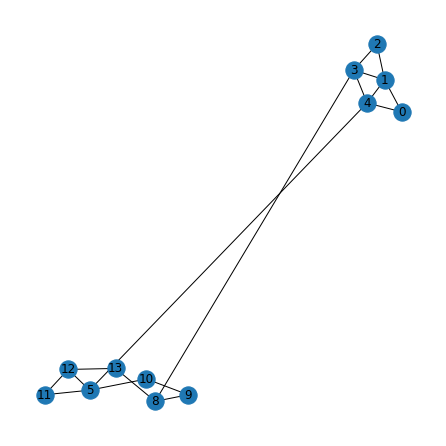

In [ ]:
# identify largest connected component
old_nodes = set(G.nodes())
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
New_nodes = set(Gcc[0])
remove_edges = old_nodes-New_nodes
print("len of the largest component is: {}".format(len(New_nodes)))
print("presentage of the reminded nodes are: {}".format(len(New_nodes)/(len(original_nodes)+1)))
#------------------------------------
# plot lorgest component
#------------------------------------
he = remove_edges
pp.drop_buses(Net, he, drop_elements=True); # drop the nodes
G.remove_nodes_from(he)
plt.figure(figsize=(6,6))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

largest component by renadom removing nodes

In [ ]:
c = np.random.randint(low=0,high=2868,size=10)
c

array([1682, 2730, 2493, 1084, 2283, 2734, 2760, 1564,  116, 2764])

In [ ]:
Net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,135.000,1.0
1,True,1.06,0.94,2,b,135.000,1.0
2,True,1.06,0.94,3,b,135.000,1.0
3,True,1.06,0.94,4,b,135.000,1.0
4,True,1.06,0.94,5,b,135.000,1.0
5,True,1.06,0.94,6,b,0.208,1.0
6,True,1.06,0.94,7,b,14.000,1.0
7,True,1.06,0.94,8,b,12.000,1.0
8,True,1.06,0.94,9,b,0.208,1.0
9,True,1.06,0.94,10,b,0.208,1.0


In [ ]:
Net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,135.000,1.0
1,True,1.06,0.94,2,b,135.000,1.0
2,True,1.06,0.94,3,b,135.000,1.0
3,True,1.06,0.94,4,b,135.000,1.0
4,True,1.06,0.94,5,b,135.000,1.0
5,True,1.06,0.94,6,b,0.208,1.0
6,True,1.06,0.94,7,b,14.000,1.0
7,True,1.06,0.94,8,b,12.000,1.0
8,True,1.06,0.94,9,b,0.208,1.0
9,True,1.06,0.94,10,b,0.208,1.0


In [ ]:
netbus = Net.bus['name'] -1

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
Name: name, dtype: object

12


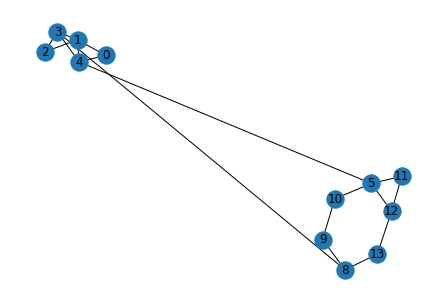

In [ ]:
G = top.create_nxgraph(Net)
print(len(G.nodes()))
nx.draw(G,with_labels=True)

In [ ]:
pp.different_voltage_levels_connected(net=Net)

# Simulator

In [ ]:
import random as rn

In [ ]:
set([1,2,3,4]) - set([1,2,3,5])

{4}

In [ ]:
# class Two_layerd_Network(object):
#     def __init__(self):

seed = 1537
alpha = 0.39
beta = 0.1
gamma = 1 - (alpha + beta)
# self.pow_network()

def pow_network():
    Network = pn.case30()
    G_power = top.create_nxgraph(net=Network)
    G_power_nodes = G_power.nodes()
    # G_power_nodes_Number = len(G_power_nodes)
    G_power_edges = G_power.edges()
    target = int(Network.ext_grid['bus'])
    return Network,target,G_power,G_power_nodes,G_power_edges

def com_network(Network):
    Static_node_of_power = len(Network.bus)
    G_scale_free = nx.scale_free_graph(n=Static_node_of_power,
                                       alpha=alpha,
                                       beta=beta,
                                       gamma=gamma,
                                       seed=seed,
                                       delta_in=1,
                                       delta_out=1)
    G_com_edges = G_scale_free.edges()
    G_com_edges_set = set(G_com_edges)
    G_com_edges_set_non_redundancy = []
    for G_edge in G_com_edges_set:
        if (G_edge[1],G_edge[0]) and (G_edge[0],G_edge[1]) not in G_com_edges_set_non_redundancy:
            if G_edge[1] != G_edge[0]:
                G_com_edges_set_non_redundancy.append(G_edge)
    G_com = nx.MultiGraph()
    G_com.add_edges_from(G_com_edges_set_non_redundancy);
        # add a few work to this
    mapping = {0:target,target:0}
    G_com = nx.relabel_nodes(G_com, mapping)
        # extract initial information
    G_com_nodes = G_com.nodes()
    G_com_edges = G_com.edges()
    return G_com, G_com_nodes, G_com_edges

def base(G_com,G_power,Network):
    G_power = top.create_nxgraph(net=Network)
    nodes = np.array(G_power.nodes())
    nodes2 = G_com.nodes()
    n1 = list(set(nodes) - set(nodes2))
    n2 = list(set(nodes2) - set(nodes))
    pp.drop_buses(net = Network, buses = n1 , drop_elements=True)
    G_com.remove_nodes_from(n2)
    G_power = top.create_nxgraph(net=Network)
    return G_com, Network, G_power

def remove_pow_node_randomly(Network,targt):
    G_power = top.create_nxgraph(net=Network)
    nodes = np.array(G_power.nodes())
    n = len(nodes)
    m = np.random.randint(0,n)
    if nodes[m] != target:
        pp.drop_buses(net = Network, buses = [nodes[m]] , drop_elements=True)
    G_power = top.create_nxgraph(net=Network)
    G_power_nodes = G_power.nodes()
    G_power_edges = G_power.edges()
    return Network,G_power,G_power_nodes,G_power_edges

def remove_pow_nodes_by_list():
    pass
def remove_pow_edge_randomly():
    pass
def remove_pow_enges_by_list():
    pass
def remove_com_node_randomly(G_com):
    n = len(G_com.nodes())
    m = np.random.randint(0,n)
    nodes = list(G_com.nodes())
    G_com.remove_node(nodes[m])
    return G_com

def remove_com_nodes_by_list(G_com,n):
    for i in range(n):
        nodes = np.array(G_com.nodes())
        np.random.shuffle(nodes)
        G_com.remove_node(nodes[i])
    return G_com

def remove_com_edge_randomly():
    pass
def remove_com_enges_by_list():
    pass
def compute_casecade():
    pass
def remove_by_popuse():
    pass




In [ ]:
Network,target,G_power,G_power_nodes,G_power_edges = pow_network()

In [ ]:
G_com, Network, G_power = base(G_com,G_power,Network)

In [ ]:
G_com, G_com_nodes, G_com_edges = com_network(Network)


In [ ]:
print(Network)
Network,G_power,G_power_nodes,G_power_edges = remove_pow_node_randomly(Network,target)
print(Network)


This pandapower network includes the following parameter tables:
   - bus (28 elements)
   - load (19 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (36 elements)
   - poly_cost (6 elements)
   - bus_geodata (28 elements)
This pandapower network includes the following parameter tables:
   - bus (27 elements)
   - load (18 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (34 elements)
   - poly_cost (6 elements)
   - bus_geodata (27 elements)


In [ ]:
np.random.randint(0,30)

18

In [ ]:
# Simulating the Casecading Failure
    # add some setting here


# creating the Power network

class Two_layerd_Network(object):
    def __init__(self, Nett, panda=None,list = None):


        # creating the Com network
            # creating Com from scrach (Scale free)
        # self.panda = panda
        Static_Net = Nett
        self.Net = Nett
        self.Static_Net = Nett
        self.seed = 1537
        self.alpha = 0.39
        self.beta = 0.1
        self.gamma = 1-(self.alpha + self.beta)
        if list != None and panda == None:
            print(21)
            self.information = self.remove_by_list(Static_Net,list)
        else:
            print(24)
            self.create_pow_network(self.Static_Net)
            self.create_com_network(self.Static_Net)
            self.posC = nx.spring_layout(self.G_com, seed = self.seed)
            self.posP = nx.spring_layout(self.G_power, seed = self.seed)
            if panda != None:
                self.plot_networks(self.G_com, self.G_power)
            self.initiam_com_nodes = self.G_com_nodes
            self.initiam_com_edges = self.G_com_edges
            self.initiam_pow_nodes = self.G_power.nodes()
            self.initiam_pow_edges = self.G_power.edges()
            if panda == None and list == None:
                self.G_com, self.Net = self.remove_nodes_Initaly_randomly(self.G_com, self.Net)
            if panda != None and list == None:
                self.remove = panda
                self.G_com, self.Net = self.remove_by_purpose(self.G_com, self.Net, self.remove)

            
            self.G_com, self.Net = self.Casecade(self.G_com, self.Net)
            self.G_power = top.create_nxgraph(self.Net)
            self.end_com_nodes = self.G_com.nodes()
            self.end_com_edges = self.G_com.edges()
            self.end_pow_nodes = self.G_power.nodes()
            self.end_pow_edges = self.G_power.edges()
            # print("self.removable_node",self.removable_node)
            # print("remainded node",len(self.end_com_nodes)/len(self.initiam_com_nodes))
            # print("remainded com edge",len(self.end_com_edges)/len(self.initiam_com_edges))
            # print("remainded pow edge",len(self.end_pow_edges)/len(self.initiam_pow_edges))
            if panda != None:
                self.plot_networks(self.G_com, self.G_power)
    def informations(self):
        return self.information
    def pandsa(self):
        panda = [self.removable_node,self.initiam_com_nodes,self.initiam_com_edges,self.initiam_pow_edges,self.end_com_nodes,self.end_com_edges,self.end_pow_edges]
        return panda
    def create_pow_network(self,Net):
        self.Static_Net = Net
        self.G_power = top.create_nxgraph(net=self.Static_Net)
        # extract some feature for future
        self.G_power_nodes = self.G_power.nodes()
        self.G_power_nodes_Number = len(self.G_power_nodes)
        self.G_power_edges = self.G_power.edges()
        self.target = int(self.Static_Net.ext_grid['bus'])
        # print("The target node [Controler in Com] [Ext in Pow] is node number: {}".format(self.target))
        # print("Pow settings are Done!")
        return self.G_power
    def create_com_network(self,Net):
        self.Static_node_of_power = len(Net.bus)
        self.G_scale_free = nx.scale_free_graph(n= self.Static_node_of_power, alpha= self.alpha, beta= self.beta, gamma= self.gamma, seed= self.seed, delta_in=1, delta_out=1 )
            # create Com from Scale free
        self.G_com_edges = self.G_scale_free.edges()
        self.G_com_edges_set = set(self.G_com_edges)
        self.G_com_edges_set_non_redundancy = []
        for G_edge in self.G_com_edges_set:
            if (G_edge[1],G_edge[0]) and (G_edge[0],G_edge[1]) not in self.G_com_edges_set_non_redundancy:
                if G_edge[1] != G_edge[0]:
                    self.G_com_edges_set_non_redundancy.append(G_edge)
        self.G_com = nx.MultiGraph()
        self.G_com.add_edges_from(self.G_com_edges_set_non_redundancy);
            # add a few work to this
        mapping = {0:self.target,self.target:0}
        self.G_com = nx.relabel_nodes(self.G_com, mapping)
        
        self.G_com_init = nx.MultiGraph()
        self.G_com_init.add_edges_from(self.G_com_edges_set_non_redundancy);
            # add a few work to this
        mapping = {0:self.target,self.target:0}
        self.G_com_init = nx.relabel_nodes(self.G_com_init, mapping)

        # extract initial information
        self.G_com_nodes = self.G_com_init.nodes()
        self.G_com_edges = self.G_com_init.edges()
        return self.G_com
        # print("Com Networks settings are Done!")
    # Now we have two Network in the first place
    # ---------------------------- Enable if you want rhe plot ----------------------------
    def plot_networks(self, G_com, G_power):
        plt.figure(figsize = (17,17))
        plt.subplot(211)
        self.G_com = G_com
        self.G_power = G_power
        # self.posC = nx.spring_layout(self.G_com, seed = self.seed)
        nx.draw(self.G_com,pos = self.posC ,with_labels=True)
        plt.subplot(212)
        # self.pos = nx.spring_layout(self.G_power, seed = self.seed)
        nx.draw(self.G_power, pos = self.posP,with_labels=True)
        plt.show()
    # -------------------------------------------------------------------------------------
        # choose what to remove and where to rmove
    def remove_nodes_Initaly_randomly(self,G_com,Net):
        self.Net = Net
        self.G_com = G_com
        self.removable_node = int(np.random.random() * self.G_power_nodes_Number)
        while self.target == self.removable_node:
            self.removable_node = int(np.random.random() * self.G_power_nodes_Number)
        self.Choice = np.random.random()
        rm_node = self.removable_node
        if self.Choice <0.5:
            # print("first choice was Com and it is {}".format(self.removable_node))
            self.G_com.remove_node(rm_node)
            pp.drop_buses(net = Net,buses = [rm_node] , drop_elements=True)
        else:
            # print("first choice was Pow and it is {}".format(self.removable_node))
            pp.drop_buses(net = Net,buses = [rm_node] , drop_elements=True)
            self.G_com.remove_node(rm_node)
        return self.G_com, self.Net

    def remove_by_list(self, Static_Net, list):
        print(132)
        
        Net = Static_Net
        p = top.create_nxgraph(Static_Net)
        G_comuni = self.create_pow_network(Static_Net)
        G_com = G_comuni
        initial_node = p.nodes()
        initial_pow_edges = p.edges()
        initial_com_edges = G_comuni.edges()
        information = pd.DataFrame()
        information['node'] = list
        information['initial_node'] = [len(initial_node) for _ in list]
        information['initial_pow_edges'] = [len(initial_pow_edges) for _ in list]
        information['initial_com_edges'] = [len(initial_com_edges) for _ in list]
        final_node = []
        final_pow_edges = []
        final_com_edges = []
        print(list)
        for remove in list:
            if remove == self.target:
                print(150)
                pass
            else:
                Network = pn.case30
                Net = Network()
                G_com = nx.MultiGraph(G_comuni)
                pp.drop_buses(net = Net,buses = [remove] , drop_elements=True)
                G_com.remove_node(remove)
                # G_com, Net = self.Casecade(G_com, Net)
            end_pow = top.create_nxgraph(Net)
            final_node.append(len(end_pow.nodes()))
            final_pow_edges.append(len(end_pow.edges()))
            final_com_edges.append(len(G_com.edges()))
        information['final_node'] = final_node
        information['final_pow_edges'] = final_pow_edges
        information['final_com_edges'] = final_com_edges
        # print(information['final_pow_edges'])
        return information

    def remove_by_purpose(self,G_com,Net,remove):
        self.Net = Net
        self.G_com = G_com
        pp.drop_buses(net = Net,buses = [remove] , drop_elements=True)
        self.G_com.remove_node(remove)
        return self.G_com, self.Net


    def Casecade(self,G_com,Net):
        self.G_com = G_com
        self.Net = Net
        self.G_power = top.create_nxgraph(net = self.Net)
        self.rm_nodes = set() - set()
        self.casecading = True
        while self.casecading:
            # print("2")
            self.G_com = self.Largest_component_with_target(self.G_com,self.target)
            self.G_power = self.Largest_component_with_target(self.G_power,self.target)
            End_minus_One_of_casecade = (len(self.G_com.nodes()),len(self.G_power.nodes()))
            self.set_nodes = set(self.G_com.nodes() - self.G_power.nodes())
            if len(self.set_nodes)==0:
                self.set_nodes = set(self.G_power.nodes() - self.G_com.nodes())
            # print("self.set_nodes",self.set_nodes)
            # print(self.set_nodes)
            if len(self.set_nodes) != 0:
                print("line 106 worked",self.set_nodes)
                self.Net = self.Casecade_in_pow(self.Net, self.set_nodes)
                self.G_power = top.create_nxgraph(self.Net)
                self.G_com = self.Casecade_in_com(self.G_com, self.set_nodes)
                # print("in line 127 ",self.G_com.nodes)
            End_of_casecade = (len(self.G_com.nodes()),len(self.G_power.nodes()))
            if End_minus_One_of_casecade == End_of_casecade:
                self.casecading = False
            # print(self.casecading)
        return self.G_com, self.Net
    
    def Casecade_in_pow(self,Net,nodes):
        self.Net = Net
        # instance_grph = top.create_nxgraph(self.Net)
        # instance_nodes = set(instance_grph.nodes())
        self.node = nodes
        if len(self.node) == 0:
            # self.node = instance_nodes - nodes
            self.busses = []
        elif len(self.node) == 1:
            self.busses = self.node
        else:

            self.busses = list(self.node)
        try:
            pp.drop_buses(self.Net,buses=self.busses,drop_elements = True)
        except:pass
        pp.rundcpp(self.Net)
        self.drop_lines = pp.overloaded_lines(self.Net)
        while len(self.drop_lines) !=0:
            # print("3")
            pp.drop_lines(self.Net,self.drop_lines)
            self.drop_lines = pp.overloaded_lines(self.Net)
            # print("line 135 worked.",self.drop_lines)
        g_inst = top.create_nxgraph(self.Net)
        g_inst_2 = self.Largest_component_with_target(g_inst,self.target)
        set_nodes_2 = set(g_inst) - set(g_inst_2)
        pp.drop_buses(self.Net,set_nodes_2,drop_elements = True)
        return self.Net

    def Casecade_in_com(self,G_com,nodes):
        self.G_com = G_com
        self.node = nodes
        if len(self.node)!=0:
            self.G_com = nx.MultiGraph(self.G_com)
            nx.is_frozen(self.G_com)
            self.G_com.remove_nodes_from(self.node)
        return self.G_com

    def removal(self,Graph):
        pass


    def Largest_component_with_target(self,target_Graph,target_node):
        self.G = target_Graph
        self.target_node = target_node
        # check the largest components
        self.components_of_groph = sorted(nx.connected_components(self.G), key=len, reverse=True)
        for component in self.components_of_groph:
            if self.target_node in component:
                self.G = self.G.subgraph(component)
        return self.G

if __name__ == "__main__":
    removed_node = []
    initiam_nodes = []
    initiam_com_edges = []
    initiam_pow_edges = []
    end_nodes = []
    end_com_edges = []
    end_pow_edges = []
    pandas = pd.DataFrame()
    controler = 2
    if controler == 1:
        panda = []
        Network = pn.case30
        Net = Network()
        panda = 1
        Two = Two_layerd_Network(Net,panda)
    elif controler == 2:
        Network = pn.case30
        Net = Network()
        # tr = int(Net.ext_grid['bus'])
        list = [i for i in range(len(Net.bus))]
        print(list)
        Two = Two_layerd_Network(Net,list = list)
        info = Two.informations()      
    else:
        for init in range(30):
            # self.panda = [self.initiam_com_nodes,self.initiam_com_edges,self.initiam_pow_edges,self.end_com_nodes,self.end_com_edges,self.end_pow_edges]
            panda = []
            Network = pn.case30
            Net = Network()
            Two = Two_layerd_Network(Net)
            removed_node.append(Two.pandsa()[0])
            initiam_nodes.append(Two.pandsa()[1])
            initiam_com_edges.append(Two.pandsa()[2])
            initiam_pow_edges.append(Two.pandsa()[3])
            end_nodes.append(Two.pandsa()[4])
            end_com_edges.append(Two.pandsa()[5])
            end_pow_edges.append(Two.pandsa()[6])
        pandas['removed_node']=removed_node
        pandas['initiam_nodes']=initiam_nodes
        pandas['initiam_com_edges']=initiam_com_edges
        pandas['initiam_pow_edges']=initiam_pow_edges
        pandas['end_nodes']=end_nodes
        pandas['end_com_edges']=end_com_edges
        pandas['end_pow_edges']=end_pow_edges


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
21
132
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
150


In [ ]:
#!/usr/bin/env python
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.seed = 1531
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs,seed=self.seed)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='g', alpha=0.3, linestyle='--', zorder=2)
        print(self.edges_between_layers)
        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)


if __name__ == '__main__':
    n = len(G_power.nodes())
    node_labels = {nn : str(nn) for nn in range(4*n)}

    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([G_power, G_com], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

,node,initial_node,initial_pow_edges,initial_com_edges,final_node,final_pow_edges,final_com_edges
0,0,30,41,41,30,41,41
1,1,30,41,41,29,37,37
2,2,30,41,41,29,39,39
3,3,30,41,41,29,37,37
4,4,30,41,41,29,39,39
5,5,30,41,41,29,34,34
6,6,30,41,41,29,39,39
7,7,30,41,41,29,39,39
8,8,30,41,41,29,38,38
9,9,30,41,41,29,35,35


In [ ]:
for l in range(30):
    print("for removing {:<7}".format(node['removed_node'][l]),len(node['end_nodes'][l])/len(node['initiam_nodes'][l]))

for removing 18      0.9666666666666667
for removing 6       0.9666666666666667
for removing 7       0.7
for removing 7       0.7
for removing 20      0.7333333333333333
for removing 8       0.8666666666666667
for removing 21      0.9666666666666667
for removing 29      0.9666666666666667
for removing 28      0.9666666666666667
for removing 23      0.9666666666666667
for removing 13      0.9666666666666667
for removing 12      0.8666666666666667
for removing 1       0.2
for removing 1       0.2
for removing 8       0.8666666666666667
for removing 23      0.9666666666666667
for removing 6       0.9666666666666667
for removing 28      0.9666666666666667
for removing 14      0.9666666666666667
for removing 25      0.9333333333333333
for removing 16      0.9333333333333333
for removing 26      0.9
for removing 8       0.8666666666666667
for removing 18      0.9666666666666667
for removing 23      0.9666666666666667
for removing 1       0.2
for removing 15      0.9666666666666667
for removi

In [ ]:
# Simulating the Casecading Failure
    # add some setting here


# creating the Power network

class Two_layerd_Network(object):
    def __init__(self, Net):


        # creating the Com network
            # creating Com from scrach (Scale free)
        self.Net = Net
        self.seed = 1537
        self.alpha = 0.39
        self.beta = 0.1
        self.gamma = 1-(self.alpha + self.beta)
        
        self.create_pow_network()
        self.create_com_network()
        self.plot_networks()

    def create_pow_network(self):
        self.G_power = top.create_nxgraph(net=self.Net)
        # extract some feature for future
        self.G_power_nodes = self.G_power.nodes()
        self.G_power_nodes_Number = len(self.G_power_nodes)
        self.G_power_edges = self.G_power.edges()
        self.target_pow = int(self.Net.ext_grid['bus'])
        print("Pow settings are Done!")

    def create_com_network(self):
        self.G_scale_free = nx.scale_free_graph(n= self.G_power_nodes_Number+1, alpha= self.alpha, beta= self.beta, gamma= self.gamma, seed= self.seed, delta_in=1, delta_out=1 )
            # create Com from Scale free
        self.G_com_edges = self.G_scale_free.edges()
        self.G_com_edges_set = set(self.G_Com_edges)
        self.G_com_edges_set_non_redundancy = []
        for G_edge in self.G_Com_edges_set:
            if (G_edge[1],G_edge[0]) and (G_edge[0],G_edge[1]) not in self.G_Com_edges_set_non_redundancy:
                if G_edge[1] != G_edge[0]:
                    self.G_Com_edges_set_non_redundancy.append(G_edge)

        self.G_com = nx.MultiGraph()
        self.G_com.add_edges_from(self.G_Com_edges_set_non_redundancy);
            # add a few work to this
        mapping = {0:self.G_power_nodes_Number,self.G_power_nodes_Number:0}
        self.G_com = nx.relabel_nodes(self.G_com, mapping)
        self.target_com = int(self.G_power_nodes_Number)
        # extract initial information
        self.G_com_nodes = self.G_com.nodes()
        self.G_com_edges = self.G_com.edges()
        print("Com Networks settings are Done!")
    # Now we have two Network in the first place
    # ---------------------------- Enable if you want rhe plot ----------------------------
    def plot_networks(self):
        plt.figure(figsize = (7,7))
        plt.subplot(211)
        self.pos = nx.spring_layout(self.G_com, seed = self.seed)
        nx.draw(self.G_com,pos = self.pos ,with_labels=True)
        plt.subplot(212)
        self.pos = nx.spring_layout(self.G_power, seed = self.seed)
        nx.draw(self.G_power, pos = self.pos,with_labels=True)
        plt.show()
    # -------------------------------------------------------------------------------------
        # choose what to remove and where to rmove
    def remove_nodes_Initaly_randomly(self):
        self.removable_node = [int(np.random.random() * self.G_power_nodes_Number)]
        while self.target_com and self.target_pow not in self.removable_node:
            self.removable_node = [int(np.random.random() * self.G_power_nodes_Number)]
        self.Choice = np.random.random()
        if self.Choice <0.5:
            print("first choice was Com and it is {}".format(self.removable_node))
            for rm_node in self.removable_node:
                self.G_com.remove_node(rm_node)
        else:
            print("first choice was Pow and it is {}".format(self.removable_node))
            for rm_node in self.removable_node:
                self.G_power.remove_node(rm_node)
            pp.drop_buses(net = Net,buses = self.removable_node , drop_elements=True)
        
    def Casecade(self,G_com,G_power):
        self.G_com = G_com
        self.G_power = G_power
        self.rm_nodes = set() - set()
        self.casecading = True
        while self.casecading:
            self.G_com = self.Largest_component_with_target(self.G_com,self.target_com)
            self.G_power = self.Largest_component_with_target(self.G_power,self.target_pow)
            self.set_nodes = set(self.G_com.nodes() or self.G_power.nodes())


            pp.rundcopp(self.Net)
            while len(pp.overloaded_lines(self.Net)) != 0:



        
        pass
    
    def Casecade_in_pow(Net,nodes):
        self.Net = Net
        self.node = nodes
        self.busses = list(self.nodes)
        pp.drop_buses(self.Net,self.busses,drop_elements = True)
        pp.rundcpp(self.Net)
        self.drop_lines = pp.overloaded_lines(self.Net)
        while len(self.drop_lines) !=0:
            pp.drop_lines(self.Net,self.drop_lines,drop_elements = True)
        return self.Net

    def Casecade_in_com(G_com,nodes):
        self.node = nodes
        self.G_com = G_com
        self.G_com.remove_nodes_from(self.node)
        

    def removal(self,Graph):
        pass


    def Largest_component_with_target(self,target_Graph,target_node):
        self.G = target_Graph
        self.target_node = target_node
        # check the largest components
        self.components_of_groph = sorted(nx.connected_components(self.G), key=len, reverse=True)
        for component in self.components_of_groph:
            if self.target_node in component:
                self.G.subgraph(component)
        return self.G

if __name__ == "__main__":
    Network = pn.case30
    Net = Network()
    Two_layerd_Network(Net)

IndentationError: expected an indented block (11952238.py, line 98)

In [ ]:
Network = pn.case9
Net = Network()
# G = top.create_nxgraph(Net)

In [ ]:
pp.drop_buses(Net,buses=[])

,p_mw,q_mvar,va_degree,vm_pu
0,163.0,NaN,9.796019,1.0
1,85.0,NaN,5.060560,1.0


In [ ]:
pp.rundcpp(Net)
Net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,163.0,NaN,9.796019,1.0
1,85.0,NaN,5.060560,1.0


In [ ]:
pp.drop_buses(net = Net,buses = [0])

In [ ]:
Net.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight


In [ ]:
Net.ext_grid['bus'] = 0

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,0,True,None,0.0,1.0,250.0,10.0,300.0,-300.0,1.0


In [ ]:
set(a and b)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [ ]:
Net.ext_grid['bus']
# int(target)

0    6171
Name: bus, dtype: uint32

In [ ]:
#!/usr/bin/env python
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.seed = 1531
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs,seed=self.seed)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='g', alpha=0.3, linestyle='--', zorder=2)
        print(self.edges_between_layers)
        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)


if __name__ == '__main__':

    # define graphs
    # n = 50
    seed = 1531
    # n = 10
    # m = 3
    # p = 0.1
    Network = pn.case_illinois200
    Net = Network() # in this example we use IEEE network known as 30-buses
    G = top.create_nxgraph(Net)
    n = len(G.nodes())+1
    # g = nx.watts_strogatz_graph(4*n,m,p,seed = seed)
    # g = nx.erdos_renyi_graph(4*n, p=0.1, seed=seed)
    # h = nx.gnm_random_graph(4*n, 5*n, seed = seed )
    alpha = 0.49
    beta = 0.5
    gamma = 1-(alpha + beta)
    Gr = nx.scale_free_graph(n= n, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
    edge = list(Gr.edges)
    edges = [(i[0],i[1]) for i in edge if i[0]!=i[1] ]
    i = nx.MultiGraph()
    i.add_edges_from(edges)
    mapping = {0:len(i.nodes)-1,len(i.nodes)-1:0}
    i = nx.relabel_nodes(i, mapping)
    # mapping = {5:6,6:5}
    # i = nx.relabel_nodes(i, mapping)
    # i = nx.erdos_renyi_graph(2*n, p=0.4)
    # print(len(i.nodes))
    node_labels = {nn : str(nn) for nn in range(4*n+1)}

    # initialise figure and plot
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([G, i], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

In [ ]:

# define graphs
# n = 50
seed = 1531
# n = 10
# m = 3
# p = 0.1
Network = pn.case_illinois200
Net = Network() # in this example we use IEEE network known as 30-buses
j = top.create_nxgraph(Net)
n = len(j.nodes())+1
initial_n = n
# g = nx.watts_strogatz_graph(4*n,m,p,seed = seed)
# g = nx.erdos_renyi_graph(4*n, p=0.1, seed=seed)
# h = nx.gnm_random_graph(4*n, 5*n, seed = seed )
alpha = 0.39
beta = 0.3
gamma = 1-(alpha + beta)
Gr = nx.scale_free_graph(n= n, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
edge = list(Gr.edges)
edges = [(i[0],i[1]) for i in edge if i[0]!=i[1] ]
i = nx.MultiGraph()
set_edges = []
for ii in set(edges):
    if (ii[0],ii[1]) and (ii[1],ii[0]) not in set_edges:
        set_edges.append(ii)
i.add_edges_from(set_edges)
mapping = {0:len(i.nodes)-1,len(i.nodes)-1:0}
i = nx.relabel_nodes(i, mapping)
# mapping = {5:6,6:5}
# i = nx.relabel_nodes(i, mapping)
# i = nx.erdos_renyi_graph(2*n, p=0.4)
# print(len(i.nodes))
node_labels = {nn : str(nn) for nn in range(4*n+1)}


In [ ]:
Network = pn.case9
Net = Network(); # create a new network
shunt = list(Net.shunt['bus'])
load = list(Net.load['bus'])
gen = list(Net.gen['bus'])
ext_grid = list(Net.ext_grid['bus'])                                  # visualization.
g = top.create_nxgraph(Net)
original_nodes = g.nodes()
Org_edges = g.edges()
high = len(original_nodes)
print(high)
outages = pd.DataFrame()
# pos = nx.spring_layout(g, seed=3068)    # Seed layout for reproducibility)
# old_nodes1 = set(g.nodes())
#-------------------------------------------------------------------------------
num = 50
outage_num = []
outage = []
outage_link = []
remove_nodes = []
kind = []
lost = []
nodes = []

choice = np.random.random()
if choice >0.5:
    print("here we go with Com.")
else:
    print("here we go with Power")

for j in original_nodes:
    c = [7]
    # c0 = np.random.randint(low=0,high=high,size=2)
    # c.extend(c0)
    # c[0] = 5
    if int(Net.ext_grid['bus']) not in c:
        if j in shunt:
            kin = 'shunt'
        elif j in gen:
            kin = 'gen'
        elif j in load:
            kin = 'load'
        else:
            # print("shit {}".format(j))
            kin = 'trafo'
        kind.append(kin)
        outage_num.append(c)
        h= c # this is list of nodes that we want to remove in first place
        # print(h)
        # h = c
        Net = Network(); # create a new network each time we run
        pp.drop_buses(Net, h, drop_elements=True); # drop the nodes
        linka = []  # list o removed lines
        pp.rundcpp(net=Net); # run the current equation 
        while len(pp.overloaded_lines(Net))!= 0:
            for i in pp.overloaded_lines(Net):
                linka.append(i)
            pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
            pp.rundcpp(net=Net);
        #-------------------------------------------------------------------------------
                                    # list of edges that 
        # for i in range(len(linka)):                     # must be removed
        #     lost.append(line["line"][linka].iloc[i])
        # lost
        # # print(linka)
        # outage_link.append(len(lost))
        # #-------------------------------------------------------------------------------
        g = top.create_nxgraph(Net)
        # # original_nodes = g.nodes()

        # g.remove_nodes_from(h)
        # g.remove_edges_from(lost)
        #-------------------------------------------------------------------------------
        # identify largest connected component
        old_nodes = set(g.nodes())
        Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
        # G0 = g.subgraph(Gcc[0])
        for k in Gcc:
            if int(Net.ext_grid['bus']) in k:
                GG = g.subgraph(k)
                # New_nodes = set(k)
        # print(New_nodes)
        New_nodes = set(GG.nodes())
        remove_node = original_nodes-New_nodes
        # remove_nodes.append(len(remove_node))
        remove_nodes.append(len(remove_node))
        outage.append(1-(len(New_nodes)/len(original_nodes)))
        lost.append(set(Org_edges)-set(GG.edges()))
        nodes.append(New_nodes)
        # outage_link.append(len(lost))
        # print("node {} and amount {}".format(c,outage[c]))
        # print("len of the largest component is: {}".format(len(New_nodes)))
        # print("presentage of the reminded nodes are: {}".format(len(New_nodes)/len(original_nodes)))
    else:
        pass
        # outage.append(1)
        # outage_num.append([c,c2])
        # outage_link.append(np.nan)
    # print(j)  
outages['otages_rand_num'] = outage_num
outages['kind'] = kind    
outages['New_nodes'] = nodes
outages['otages_rand'] = outage
outages['outage_link'] = lost
outages['remove_nodes'] = remove_nodes  
#------------------------------------
# plot lorgest component
#------------------------------------
# he = remove_edges
# pp.drop_buses(Net, he, drop_elements=True); # drop the nodes
# g.remove_nodes_from(he)
# plt.figure(figsize=(6,6))
# nx.draw(g,pos=pos,with_labels=True)
# plt.show()
outages

9
here we go with Com.


,otages_rand_num,kind,New_nodes,otages_rand,outage_link,remove_nodes
0,[7],trafo,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
1,[7],trafo,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
2,[7],load,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
3,[7],trafo,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
4,[7],gen,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
5,[7],load,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
6,[7],trafo,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
7,[7],gen,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2
8,[7],load,"{0, 2, 3, 4, 5, 6, 8}",0.222222,"{(6, 7), (7, 1), (7, 8)}",2


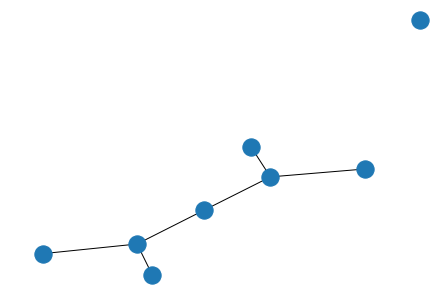

In [ ]:
g = top.create_nxgraph(Net)
nx.draw(g)
plt.show()

In [ ]:
g.

C:\Users\wind\AppData\Roaming\Python\Python39\site-packages\pandapower\diagnostic.py:723: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  net.bus.in_service.loc[section]):


[{'buses': [1], 'gens': [0]}]

In [ ]:
pp.drop_out_of_service_elements(Net)

In [ ]:
outages[outages['otages_rand']>0.05]

,otages_rand_num,kind,New_nodes,otages_rand,outage_link,remove_nodes
95,[99],gen,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.09322,"{(99, 103), (99, 100), (108, 109), (104, 105),...",11


In [ ]:
!pip install sklearn

for removing nodes [8]


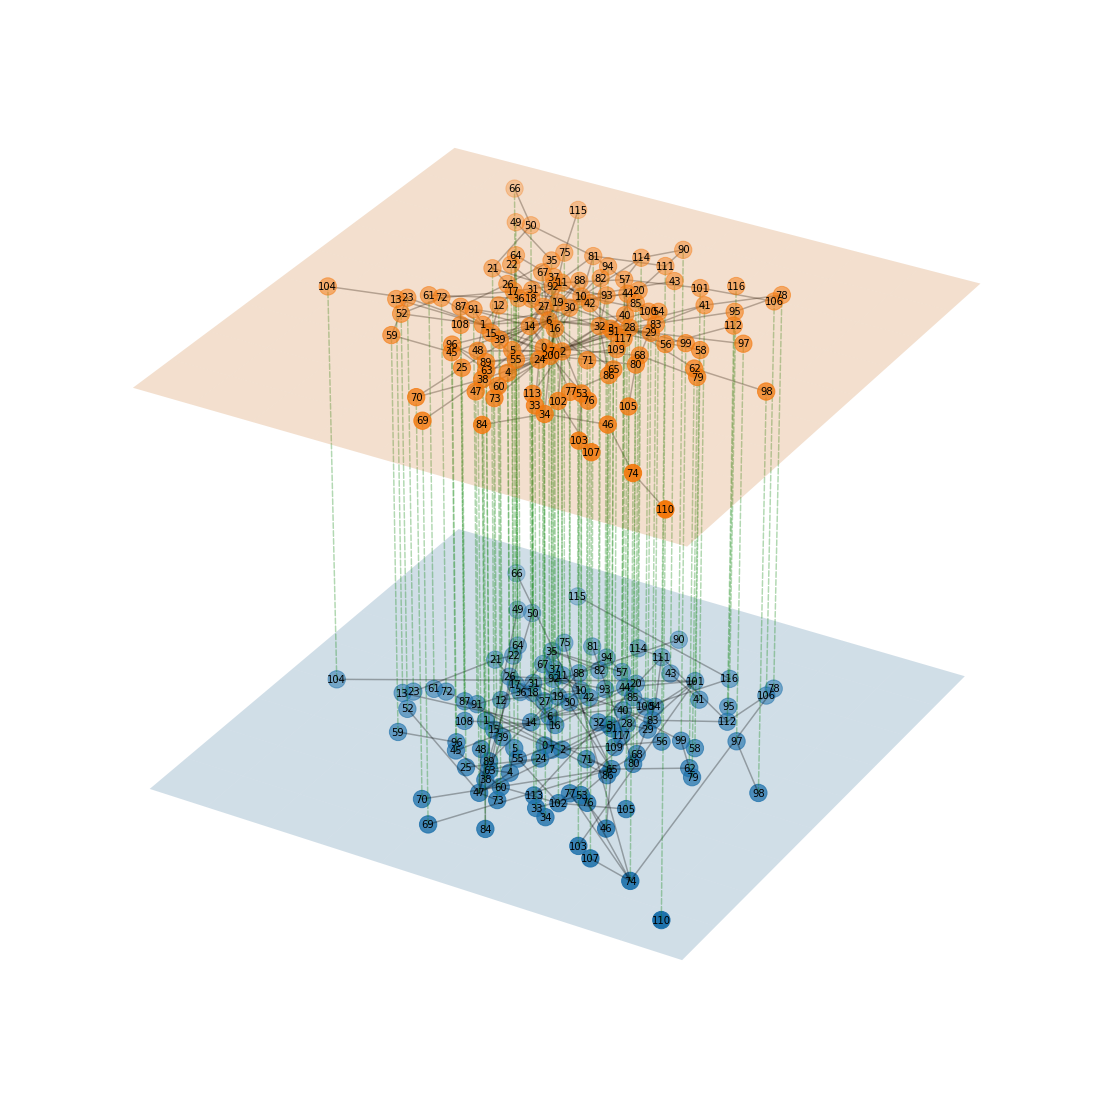

In [ ]:
#!/usr/bin/env python
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, seed, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.seed = seed
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs,seed=self.seed)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='g', alpha=0.3, linestyle='--', zorder=2)
        # print(self.edges_between_layers)
        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)


if __name__ == '__main__':
    u = 8
    k = list(outages['New_nodes'][u])
    print("for removing nodes {}".format(outages['otages_rand_num'][u]))
    seed = int(np.random.random()*1000)
    j_ = j.subgraph(k)
    k.append(n-1)
    i_ = i.subgraph(k)
    # initialise figure and plot
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([j_, i_], node_labels=node_labels, seed=seed ,ax=ax , layout=nx.spring_layout)
    # LayeredNetworkGraph([j, i], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

In [ ]:
seed = 151
layout=nx.spring_layout
pos = layout(composition,seed=seed)
pos

{0: array([-0.472285  , -0.23005094]),
 1: array([-0.11044557, -0.12103989]),
 2: array([-0.20279907, -0.12776312]),
 11: array([-0.042978  ,  0.10248803]),
 4: array([ 0.06962354, -0.1645282 ]),
 3: array([0.09345089, 0.08689985]),
 10: array([0.27029622, 0.03854598]),
 5: array([-0.1098943 ,  0.17143864]),
 7: array([-0.11198513, -0.02469441]),
 6: array([0.03302261, 0.295517  ]),
 29: array([ 0.27265048, -0.06018664]),
 12: array([0.27500095, 0.1647577 ]),
 13: array([-0.28948389,  0.12741059]),
 15: array([-0.37672415, -0.15024756]),
 116: array([0.34052164, 0.28178286]),
 14: array([0.14846463, 0.04058717]),
 16: array([-0.00489253, -0.19708902]),
 18: array([-0.15231872, -0.18231401]),
 32: array([-0.04468712, -0.09364232]),
 17: array([-0.27175842, -0.45823896]),
 30: array([0.22403069, 0.04690937]),
 112: array([0.46717174, 0.00762648]),
 19: array([-0.44632808, -0.09385538]),
 33: array([ 0.24543681, -0.33123237]),
 20: array([-0.2238622 ,  0.16309033]),
 21: array([-0.3831466

In [ ]:
pos

In [ ]:
graphs = [j_, i_]
composition = graphs[0]
for h in graphs[1:]:
    composition = nx.compose(composition, h)

In [ ]:
list(graphs[0])

In [ ]:
list(composition)

In [ ]:
set(i_.edges())

{(0, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 12),
 (1, 13),
 (1, 30),
 (2, 3),
 (2, 15),
 (2, 30),
 (3, 6),
 (3, 14),
 (3, 30),
 (4, 30),
 (6, 30),
 (11, 30),
 (12, 30)}

In [ ]:
# Working with absolute shit Not


# define graphs
# n = 50
seed = 1531
# n = 10
# m = 3
# p = 0.1
# Network = pn.case_illinois200
Network = pn.case14
Net = Network() # in this example we use IEEE network known as 30-buses
jj = top.create_nxgraph(Net)
j = nx.Graph()
j.add_edges_from(jj.edges())
n = len(j.nodes())+1
initial_n = n
# g = nx.watts_strogatz_graph(4*n,m,p,seed = seed)
# g = nx.erdos_renyi_graph(4*n, p=0.1, seed=seed)
# h = nx.gnm_random_graph(4*n, 5*n, seed = seed )
alpha = 0.49
beta = 0.5
gamma = 1-(alpha + beta)
Gr = nx.scale_free_graph(n= n, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
edge = list(Gr.edges)
edges = [(i[0],i[1]) for i in edge if i[0]!=i[1] ]
i = nx.Graph()
i.add_edges_from(set(edges))
mapping = {0:len(i.nodes)-1,len(i.nodes)-1:0}
i = nx.relabel_nodes(i, mapping)
# mapping = {5:6,6:5}
# i = nx.relabel_nodes(i, mapping)
# i = nx.erdos_renyi_graph(2*n, p=0.4)
# print(len(i.nodes))
node_labels = {nn : str(nn) for nn in range(4*n+1)}


In [ ]:

# define graphs
# n = 50
seed = 1531
# n = 10
# m = 3
# p = 0.1
Network = pn.case_illinois200
Net = Network() # in this example we use IEEE network known as 30-buses
j = top.create_nxgraph(Net)
n = len(j.nodes())+1
initial_n = n
# g = nx.watts_strogatz_graph(4*n,m,p,seed = seed)
# g = nx.erdos_renyi_graph(4*n, p=0.1, seed=seed)
# h = nx.gnm_random_graph(4*n, 5*n, seed = seed )
alpha = 0.39
beta = 0.3
gamma = 1-(alpha + beta)
Gr = nx.scale_free_graph(n= n, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
edge = list(Gr.edges)
edges = [(i[0],i[1]) for i in edge if i[0]!=i[1] ]
i = nx.MultiGraph()
set_edges = []
for ii in set(edges):
    if (ii[0],ii[1]) and (ii[1],ii[0]) not in set_edges:
        set_edges.append(ii)
i.add_edges_from(set_edges)
mapping = {0:len(i.nodes)-1,len(i.nodes)-1:0}
i = nx.relabel_nodes(i, mapping)
# mapping = {5:6,6:5}
# i = nx.relabel_nodes(i, mapping)
# i = nx.erdos_renyi_graph(2*n, p=0.4)
# print(len(i.nodes))
node_labels = {nn : str(nn) for nn in range(4*n+1)}


In [ ]:
len(edges)

34

In [ ]:
outages[outages['remove_nodes'] > 80]

,otages_rand_num,kind,otages_rand,outage_link,remove_nodes
22,"[22, 76, 48, 36, 74, 33]",load,0.889831,0,105
23,"[23, 76, 48, 36, 74, 33]",gen,0.898305,0,106
67,"[69, 76, 48, 36, 74, 33]",gen,0.940678,0,111


In [ ]:
outages['kind']

In [ ]:
outages['otages_rand'].describe()

In [ ]:
outages[outages['otages_rand']>0.15]

,otages_rand_num,kind,otages_rand,outage_link,remove_nodes
48,[48],gen,0.219298,0,"{7, 8, 9, 25, 29, 37, 48, 49, 50, 51, 52, 53, ..."
75,[76],gen,0.377193,0,"{7, 8, 9, 25, 29, 37, 62, 63, 64, 76, 77, 78, ..."
98,[99],gen,0.175439,0,"{7, 8, 9, 25, 29, 37, 62, 63, 64, 99, 102, 103..."


In [ ]:
Net = Network();
Net

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (41 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)

In [ ]:
shunt = list(Net.shunt['bus'])
load = list(Net.load['bus'])
gen = list(Net.gen['bus'])
ext_grid = list(Net.ext_grid['bus'])


[4, 23]

In [ ]:
Net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,1,True,True,None,60.97,1.0,NaN,None,1.0,False,80.0,0.0,60.0,-20.0,0.0
1,21,True,True,None,21.59,1.0,NaN,None,1.0,False,50.0,0.0,62.5,-15.0,0.0
2,26,True,True,None,26.91,1.0,NaN,None,1.0,False,55.0,0.0,48.7,-15.0,0.0
3,22,True,True,None,19.20,1.0,NaN,None,1.0,False,30.0,0.0,40.0,-10.0,0.0
4,12,True,True,None,37.00,1.0,NaN,None,1.0,False,40.0,0.0,44.7,-15.0,0.0


In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (2866 elements)
   - load (1309 elements)
   - sgen (179 elements)
   - gen (509 elements)
   - shunt (2194 elements)
   - ext_grid (1 element)
   - line (4046 elements)
   - trafo (530 elements)
   - poly_cost (510 elements)
   - bus_geodata (2866 elements)
 and the following results tables:
   - res_bus (2866 elements)
   - res_line (4046 elements)
   - res_trafo (530 elements)
   - res_ext_grid (1 element)
   - res_load (1309 elements)
   - res_sgen (179 elements)
   - res_shunt (2194 elements)
   - res_gen (509 elements)

# Graph

# Implemetation

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility
g.remove_node(h)
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

In [ ]:
edges

In [ ]:
g = nx.Graph()
g.add_edges_from(edges)


In [ ]:
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility

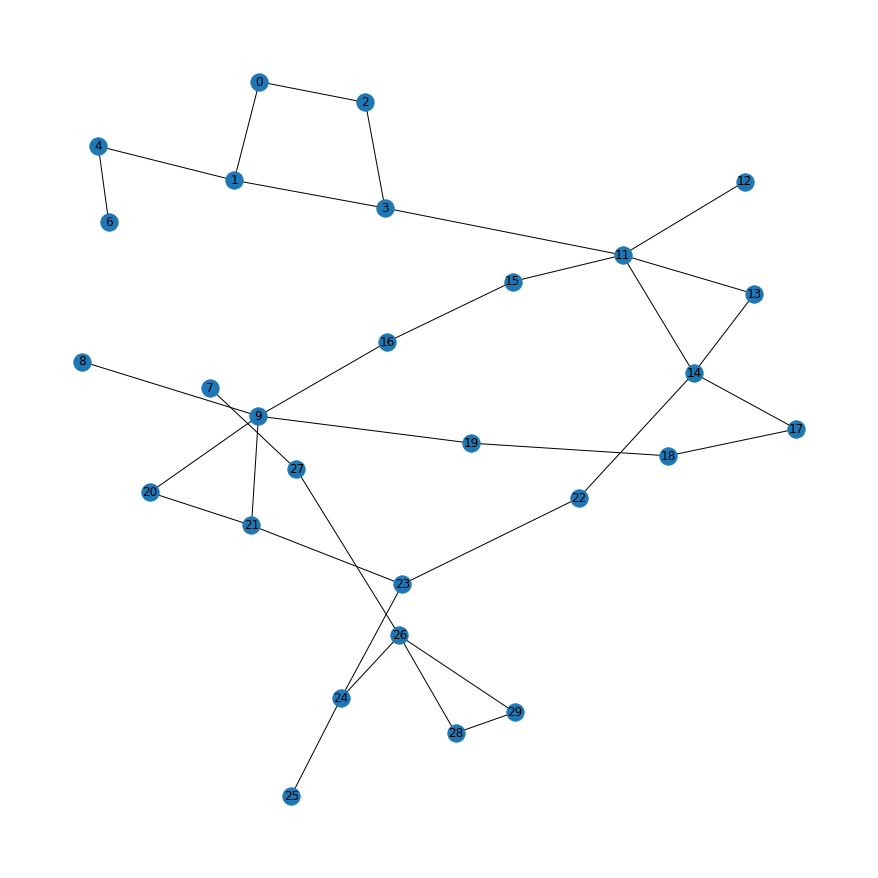

In [ ]:
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

In [ ]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
Gcc

In [ ]:
O0 = Gcc[1]
O0

{7, 8, 9, 25, 29, 37, 62, 63, 64}

In [ ]:
O1 = list(Net.gen['bus'])

In [ ]:
for i in O1:
    if i in O0:
        print(i)

7
9
25
64


In [ ]:
largest_cc = max(nx.connected_components(g), key=len)
largest_cc

In [ ]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G0 = g.subgraph(Gcc[0])

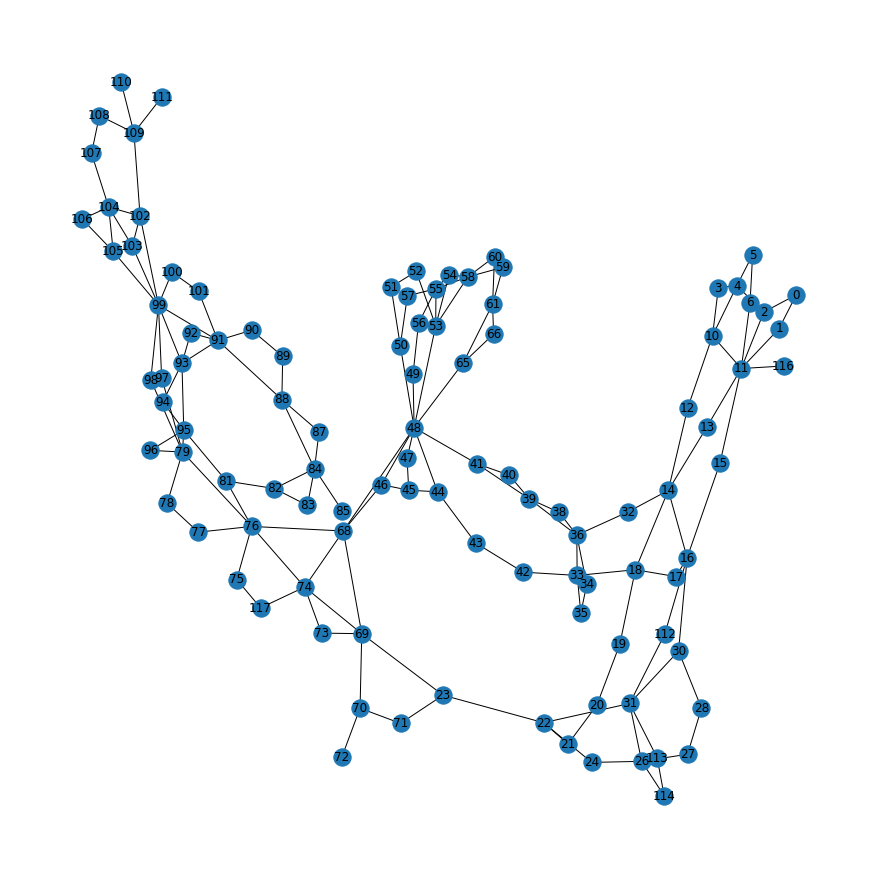

In [ ]:
plt.figure(figsize=(12,12))
nx.draw(G0,pos=pos,with_labels=True)
plt.show()

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 17: 1, 18: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 32: 1, 35: 1, 37: 1, 39: 1, 43: 1, 44: 1, 45: 1, 47: 1, 49: 1, 52: 1, 53: 1, 60: 1, 61: 1, 62: 1, 65: 1, 66: 1, 67: 1, 70: 1, 71: 1, 77: 1, 79: 1, 80: 1, 83: 1, 87: 1, 88: 1, 92: 1, 93: 1, 94: 1, 95: 1, 97: 1, 100: 1, 106: 1, 110: 1, 111: 1, 116: 1, 125: 1, 128: 1, 134: 1, 136: 1, 137: 1, 150: 1, 155: 1, 158: 1, 164: 1, 166: 1, 169: 1, 171: 1, 172: 1, 173: 1, 179: 1, 180: 1, 182: 1, 183: 1, 187: 1, 189: 1, 191: 1, 197: 1, 199: 1, 13: 2, 14: 2, 15: 2, 16: 2, 25: 2, 31: 2, 33: 2, 34: 2, 36: 2, 38: 2, 40: 2, 41: 2, 42: 2, 46: 2, 48: 2, 51: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 63: 2, 64: 2, 68: 2, 69: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 78: 2, 81: 2, 84: 2, 85: 2, 86: 2, 90: 2, 91: 2, 96: 2, 98: 2, 103: 2, 104: 2, 107: 2, 108: 2, 109: 2, 112: 2, 113: 2, 115: 2, 117: 2, 118: 2, 120: 2

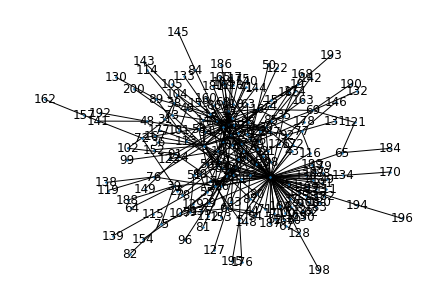

In [ ]:
G = nx.Graph()
G.add_edges_from(edges)
pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("with lenght X we have y path")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

# print(f"radius: {nx.radius(G)}")
# print(f"diameter: {nx.diameter(G)}") #maximum lenght
# print(f"eccentricity: {nx.eccentricity(G)}")
# print(f"center: {nx.center(G)}")
# print(f"periphery: {nx.periphery(G)}") # nodes with max lenght
# print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility

# options = {
#     "node_color": "#A0CBE2",
#     "edge_color": "#A4CBE2",
#     "width": 4,
#     "edge_cmap": plt.cm.Blues,
#     "with_labels": False,
# }
# nx.draw(G, pos=pos, **options)

nx.draw(G, pos=pos, with_labels=True,width=1,node_size=2)
plt.show()
# atlas(G)
